<div class="alert alert-block alert-info"> <br>

#  <center>  **Deep Learning Project** </center> <br>
##  <center> Exploratory Data Analysis </center> <br>
### <center> Spring Semester 2024-2025 <center>
#### <center> Group 6 <center>

  <div>

### Group Members

| Name              | Email                        | Student ID |
|-------------------|------------------------------|------------|
| João Santos       | 20211691@novaims.unl.pt      | 20211691   |
| Nuno Bernardino   | 20211546@novaims.unl.pt      | 20211546   |
| Rita Serra        | 20240515@novaims.unl.pt      | 20240515   |
| Rui Lourenço      | 20211639@novaims.unl.pt      | 20211639   |
| Tiago Pedro       | 20240655@novaims.unl.pt      | 20240655   |

# Importing Libraries

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import os,zipfile,shutil
import time
import random


# Visualizations
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Importing Data

Creating a path:

In [ ]:
gdrive=True
if gdrive:
    from google.colab import drive
    drive.mount('/content/drive')
    path = "/content/drive/MyDrive/DL"
else:
    path = "."


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Extract the files into the "rare_species" folder
zip_path = path + '/rare_species.zip'
z = zipfile.ZipFile(zip_path)

# Create the extraction folder if it does not exist
os.makedirs("rare_species", exist_ok=True)

# Extract the files into the "rare_species" folder
z.extractall("rare_species")

del z

In [ ]:
# Get the actual diretory
base_path = os.path.join(os.getcwd(), 'rare_species')
print(base_path)

/content/rare_species


In [ ]:
metadata = pd.read_csv( base_path + '/metadata.csv')

In [ ]:
metadata.head(10)

,rare_species_id,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
0,75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,animalia,mollusca,unionidae,mollusca_unionidae/12853737_449393_eol-full-si...
1,28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,animalia,chordata,geoemydidae,chordata_geoemydidae/20969394_793083_eol-full-...
2,00372441-588c-4af8-9665-29bee20822c0,28895411,319982,animalia,chordata,cryptobranchidae,chordata_cryptobranchidae/28895411_319982_eol-...
3,29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,animalia,chordata,turdidae,chordata_turdidae/29658536_45510188_eol-full-s...
4,94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,animalia,chordata,indriidae,chordata_indriidae/21252576_7250886_eol-full-s...
5,dc48f2ce-4feb-4ef7-b2a2-c3c3f42bf19b,28657539,491832,animalia,arthropoda,formicidae,arthropoda_formicidae/28657539_491832_eol-full...
6,3d881320-8ba8-4580-a72c-0e7ab116b664,29548208,47043290,animalia,chordata,fringillidae,chordata_fringillidae/29548208_47043290_eol-fu...
7,7faca96a-54e6-4c80-b9e4-77ab126d904a,21232818,1033999,animalia,arthropoda,gomphidae,arthropoda_gomphidae/21232818_1033999_eol-full...
8,9f89ecab-aabd-41a4-b5b4-8ce106d85959,20315204,46561012,animalia,chordata,myliobatidae,chordata_myliobatidae/20315204_46561012_eol-fu...
9,b6ec7a70-c470-4ede-8930-05844e1efd2e,20124498,46570095,animalia,chordata,pleuronectidae,chordata_pleuronectidae/20124498_46570095_eol-...


In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11983 entries, 0 to 11982
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rare_species_id  11983 non-null  object
 1   eol_content_id   11983 non-null  int64 
 2   eol_page_id      11983 non-null  int64 
 3   kingdom          11983 non-null  object
 4   phylum           11983 non-null  object
 5   family           11983 non-null  object
 6   file_path        11983 non-null  object
dtypes: int64(2), object(5)
memory usage: 655.4+ KB


In [ ]:
metadata.duplicated().sum()

np.int64(0)

### Compares CSV file paths with actual image files on disk

In [ ]:
# Create a set with all image paths from the CSV in the format family/image
csv_image_paths = set(metadata['file_path'].tolist())

# Create a set with all actual paths on disk in the format family/image
disk_image_paths = set()

for family in os.listdir(base_path):
    family_dir = os.path.join(base_path, family)
    if os.path.isdir(family_dir):
        for image in os.listdir(family_dir):
            disk_image_paths.add(f"{family}/{image}")

# Check images that are in the CSV but NOT found in the folders
print(len(csv_image_paths))
print(len(disk_image_paths))
missing_on_disk = csv_image_paths - disk_image_paths
print(f"Images listed in the CSV but not found in the folders: {len(missing_on_disk)}")



11983
11983
Images listed in the CSV but not found in the folders: 0


# Creating a Test Set

In [ ]:
# Create a test set
train_df, test_df = train_test_split(metadata, test_size=0.1, stratify=metadata['family'], random_state=42)

print(f"Train/Val set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

Train/Val set size: 10784
Test set size: 1199


In [ ]:
train_df.to_csv(path + '/train_metadata.csv', index=False)
test_df.to_csv(path+ '/test_metadata.csv', index=False)

In [ ]:
train_df

,rare_species_id,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
11093,790fd68c-f4f4-48e5-b8b8-736156062c46,20945972,919473,animalia,chordata,pittidae,chordata_pittidae/20945972_919473_eol-full-siz...
10298,2d705c4a-9f78-4c16-bf84-34683946d671,22698153,45276639,animalia,cnidaria,meandrinidae,cnidaria_meandrinidae/22698153_45276639_eol-fu...
8164,84376f83-9b2f-4b68-b515-f774e9a74ee8,29343339,1055122,animalia,chordata,agamidae,chordata_agamidae/29343339_1055122_eol-full-si...
10800,2ba98b5a-5d37-4aa2-aceb-914cc20e6dbe,20258976,45512605,animalia,chordata,falconidae,chordata_falconidae/20258976_45512605_eol-full...
8518,7e6b06cb-b131-4637-a877-662c2f244a87,29581902,454868,animalia,chordata,iguanidae,chordata_iguanidae/29581902_454868_eol-full-si...
...,...,...,...,...,...,...,...
1633,fe331aca-a94b-45da-b326-5a77ece71fe2,20582263,46561018,animalia,chordata,myliobatidae,chordata_myliobatidae/20582263_46561018_eol-fu...
1509,260499e2-6f89-4d05-af1e-55f37d7e1e4d,21360916,45512248,animalia,chordata,trochilidae,chordata_trochilidae/21360916_45512248_eol-ful...
11451,a7e1bab1-b25f-440c-ac97-6afc7ff28148,28913279,330971,animalia,chordata,salamandridae,chordata_salamandridae/28913279_330971_eol-ful...
5724,a0d13b3c-bea0-47f1-ac48-4e6fa1b1d6ef,15267689,323960,animalia,chordata,cercopithecidae,chordata_cercopithecidae/15267689_323960_eol-f...


In [ ]:
original_dir= base_path
original_dir

'/content/rare_species'

In [ ]:
# # Define the path to the folder you want to delete
# folder_path = '/content/rare_species_div'

# # Delete the folder and all its contents
# shutil.rmtree(folder_path)

In [ ]:
base_path= os.path.join(os.getcwd(), 'rare_species_div')
base_path

'/content/rare_species_div'

In [ ]:
base_path= os.path.join(os.getcwd(), 'rare_species_div')

# Paths for the new train and test folders
train_dir = os.path.join(base_path, 'train')
test_dir = os.path.join(base_path, 'test')

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Load metadata CSVs
train_df = pd.read_csv(path + 'train_metadata.csv')
test_df = pd.read_csv(path + 'test_metadata.csv')

def copy_images(df, destination_dir):

    for _, row in df.iterrows(): # row is the data of the row as a Series.

        # Use the file_path directly from the CSV
        relative_path = row['file_path']

        # Define source and destination paths
        source_path = os.path.join(original_dir, relative_path)
        destination_path = os.path.join(destination_dir, relative_path)

        # Create destination folder if it doesn't exist
        destination_folder = os.path.dirname(destination_path)
        os.makedirs(destination_folder, exist_ok=True)

        # Copy the image
        if os.path.exists(source_path):
            shutil.copy2(source_path, destination_path)

        else:
            print(f" {source_path} does not exist!")

# Copy images for training set
copy_images(train_df, train_dir)

# Copy images for test set
copy_images(test_df, test_dir)

if gdrive:
    # Define your Google Drive path
    drive_backup_path = '/content/drive/MyDrive/DL/rare_species_div'

    # Create the ZIP file in Google Drive
    shutil.make_archive(drive_backup_path, 'zip', base_path)

    print(f"ZIP created at: {drive_backup_path}.zip")

# Exploring the Data

In [ ]:
train_path = os.path.join(base_path, 'train')
folders = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]

print(folders)
print(len(folders))

['chordata_pittidae', 'cnidaria_meandrinidae', 'chordata_agamidae', 'chordata_falconidae', 'chordata_iguanidae', 'chordata_mesitornithidae', 'chordata_dactyloidae', 'chordata_spheniscidae', 'chordata_crocodylidae', 'arthropoda_papilionidae', 'arthropoda_theraphosidae', 'chordata_ranidae', 'chordata_geoemydidae', 'chordata_plethodontidae', 'chordata_atelidae', 'chordata_urolophidae', 'chordata_hemiscylliidae', 'chordata_salamandridae', 'chordata_ursidae', 'chordata_leporidae', 'chordata_delphinidae', 'chordata_salmonidae', 'mollusca_haliotidae', 'mollusca_unionidae', 'chordata_myliobatidae', 'arthropoda_apidae', 'chordata_ambystomatidae', 'chordata_parulidae', 'chordata_laridae', 'chordata_siluridae', 'cnidaria_acroporidae', 'chordata_serranidae', 'chordata_lamnidae', 'chordata_anguidae', 'chordata_mimidae', 'chordata_emydidae', 'chordata_cebidae', 'chordata_callitrichidae', 'chordata_dalatiidae', 'chordata_gavialidae', 'chordata_bovidae', 'chordata_cracidae', 'arthropoda_lucanidae', 'c

In [ ]:
def count_images_per_class(base_dir):

    class_counts = {}

    for family in os.listdir(base_dir):
        family_dir = os.path.join(base_dir, family)
        # Check if the path is a directory (class folder)

        if os.path.isdir(family_dir):
            # Count all files in the class folder
            count = len(os.listdir(family_dir))
            class_counts[family] = count

    return pd.Series(class_counts).sort_values(ascending=False)

train_counts = count_images_per_class(base_path+'/train')
test_counts = count_images_per_class(base_path+'/test')

print("Train class distribution:\n", train_counts)
print("\nTest class distribution:\n", test_counts)

Train class distribution:
 chordata_dactyloidae         270
chordata_cercopithecidae     270
arthropoda_formicidae        262
chordata_salamandridae       243
chordata_plethodontidae      243
                            ... 
arthropoda_attelabidae        27
chordata_otididae             27
chordata_carettochelyidae     27
chordata_motacillidae         27
chordata_siluridae            26
Length: 202, dtype: int64

Test class distribution:
 chordata_dactyloidae        30
chordata_cercopithecidae    30
arthropoda_formicidae       29
chordata_plethodontidae     27
chordata_salamandridae      27
                            ..
chordata_paradisaeidae       3
chordata_pardalotidae        3
chordata_phasianidae         3
chordata_columbidae          3
chordata_trogonidae          3
Length: 202, dtype: int64


In [ ]:
# Just to confirm if all images from the original metadata were successfully
# copied to the train and test folders

print(f"Total images: {test_counts.sum() + train_counts.sum()}")
print(f"Total classes: {metadata.shape[0]}")


Total images: 11983
Total classes: 11983


## Plot Family Distribution

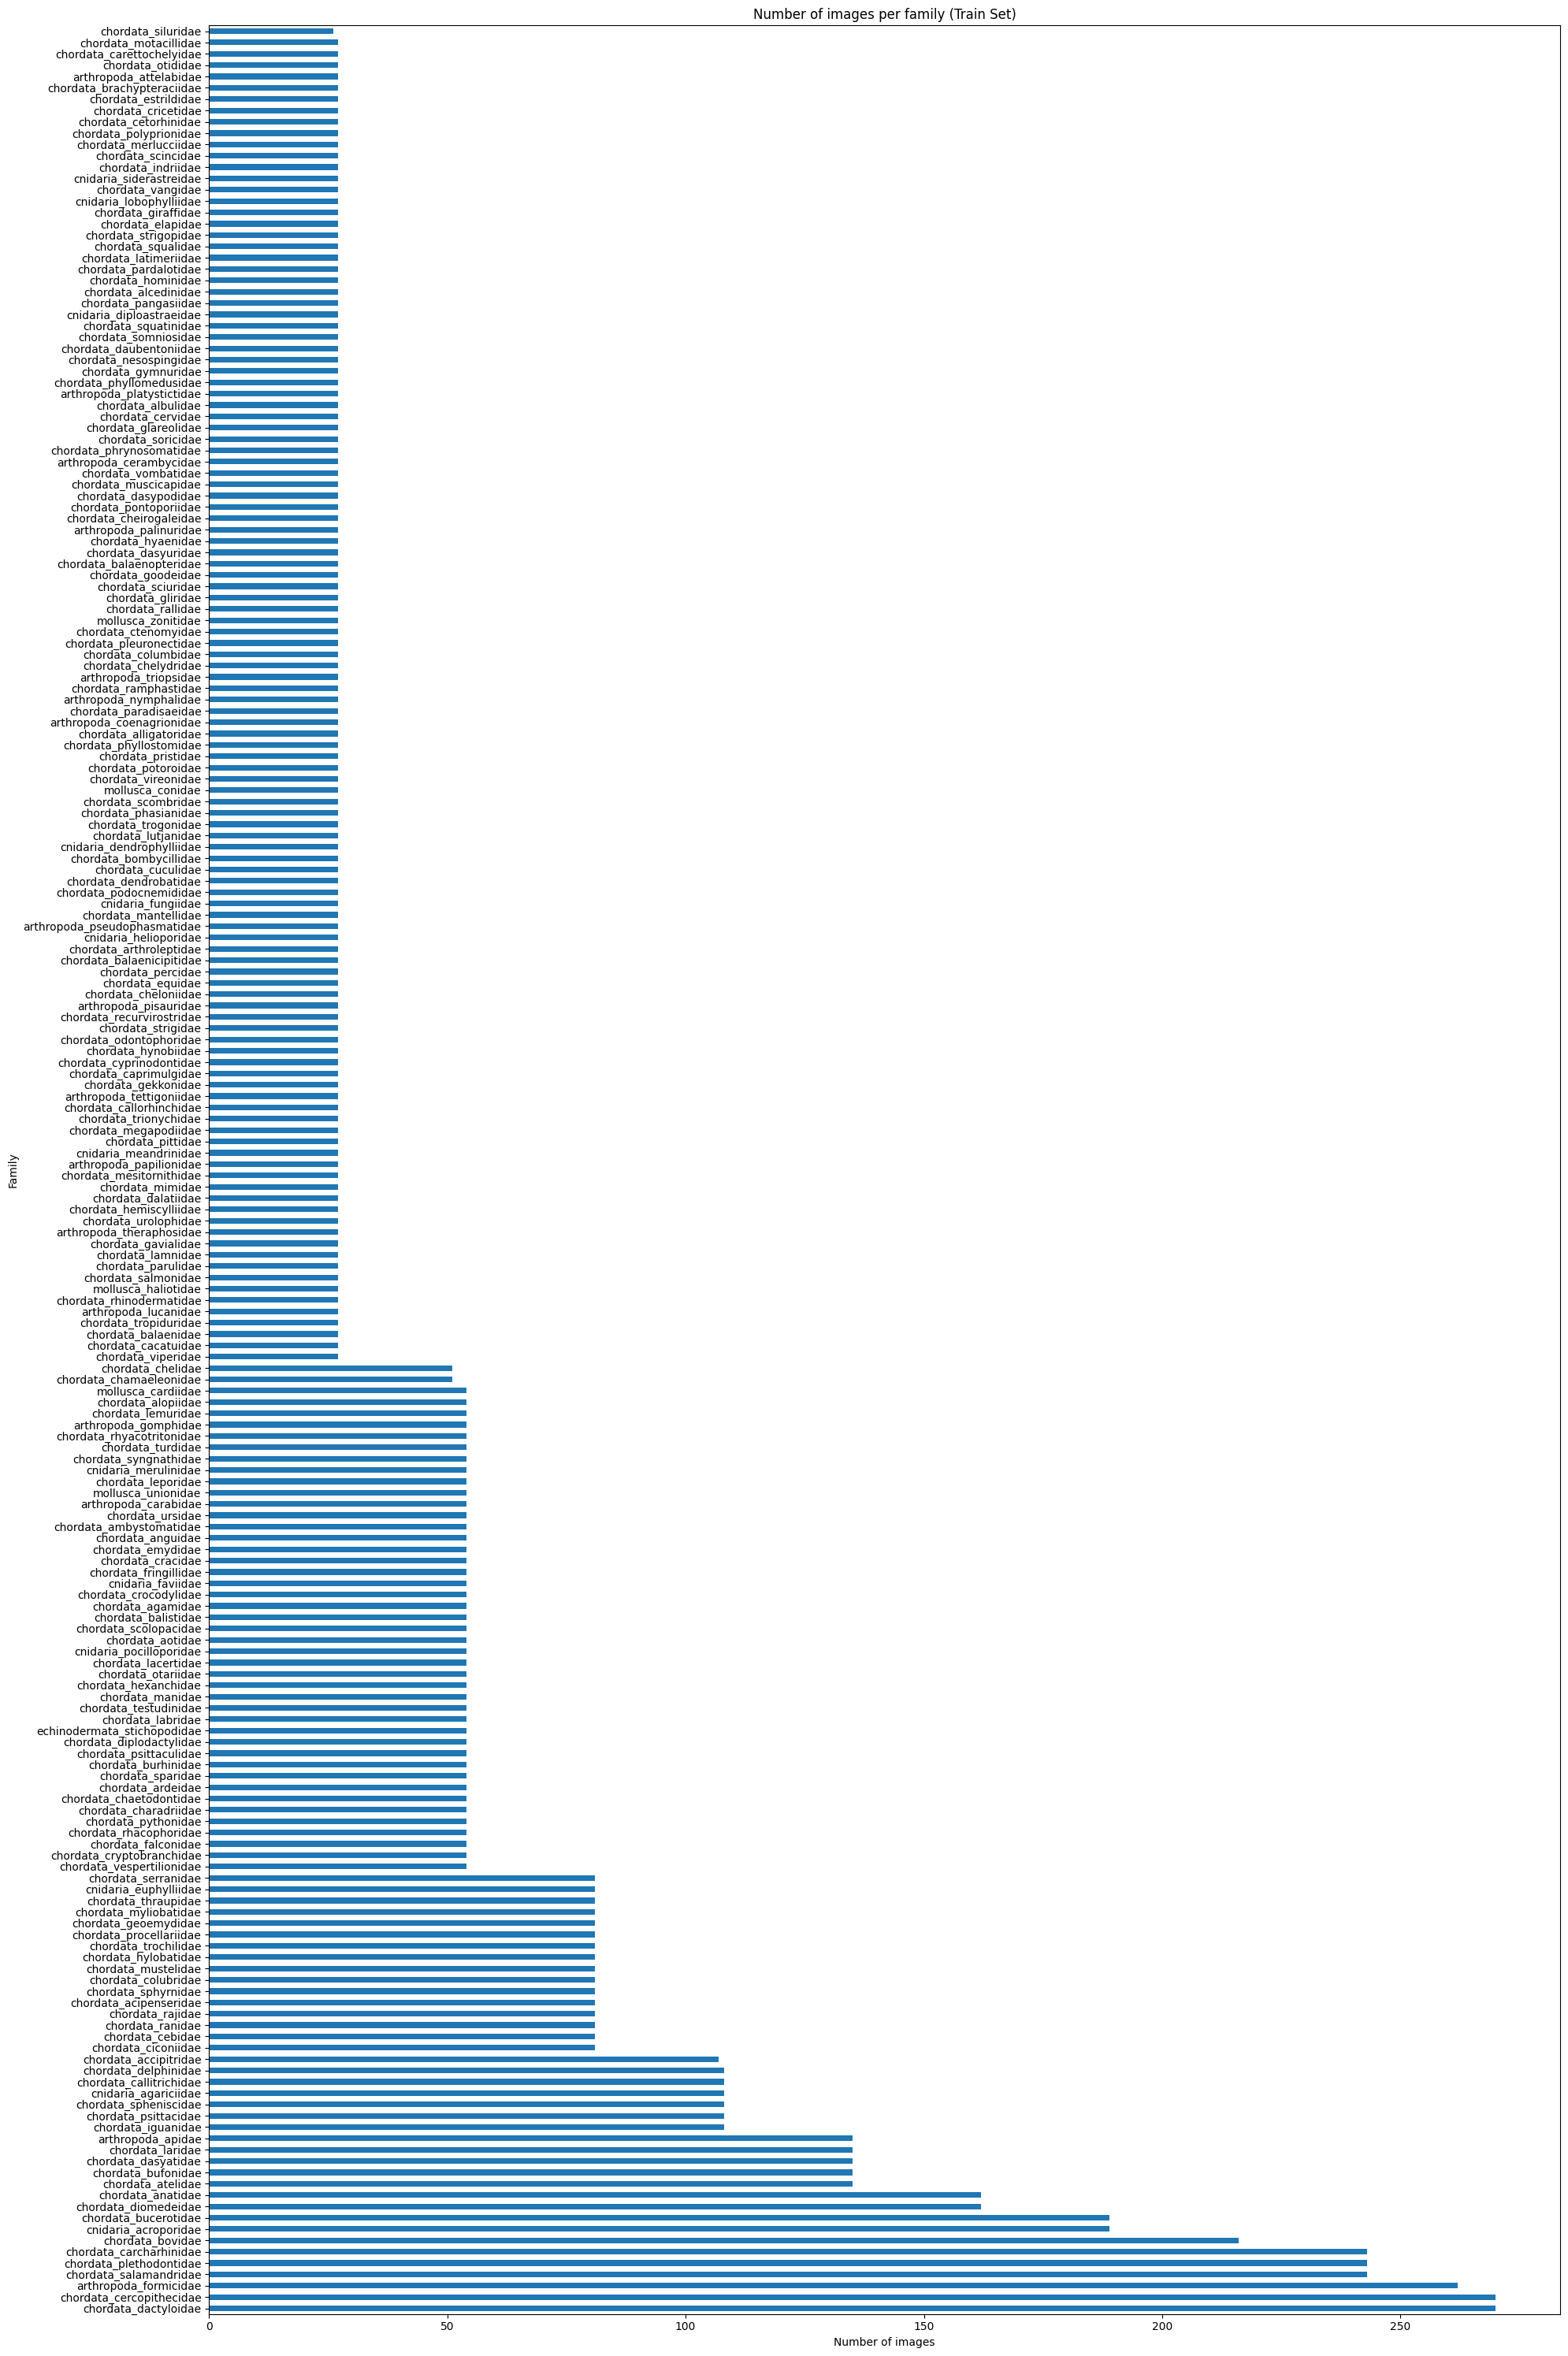

In [ ]:
plt.figure(figsize=(20, 30))
train_counts.plot(kind='barh')
plt.title('Number of images per family (Train Set)')
plt.xlabel('Number of images')
plt.ylabel('Family')
plt.tight_layout()
plt.show()

With this plot we can seen that our dataset is very imbalanced

## Sample images per family

In [ ]:
def show_sample_images(base_dir, family, num_images=3):

    # Build the full path to the family folder
    family_path = os.path.join(base_dir, family)

    # Get all image filenames in the family folder
    image_files = os.listdir(family_path)

    # Randomly select images
    selected_images = random.sample(image_files, num_images)

    # Plot the images
    plt.figure(figsize=(12, 8))
    for i, image_name in enumerate(selected_images):
        img_path = os.path.join(family_path, image_name)
        img = Image.open(img_path)

        # Create subplot
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"{img.size} image of class \"{family}\"")
        plt.axis('off')  # Hide axes for better display

    plt.tight_layout()
    plt.show()


for family in train_counts.index:
    show_sample_images(base_path+'/train', family)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for family in train_counts.index:
    show_sample_images(base_path+'/train', family)

Output hidden; open in https://colab.research.google.com to view.

Algumas imagens parecem não ser de animais

## Image Resulutions

In [ ]:
def get_image_resolutions(base_dir):

    data = []

    # Loop through each family folder
    for family in os.listdir(base_dir):
        family_dir = os.path.join(base_dir, family)

        if os.path.isdir(family_dir):
            for image_name in os.listdir(family_dir):
                image_path = os.path.join(family_dir, image_name)

                # Open the image and get its size
                img = Image.open(image_path)
                width, height = img.size

                data.append({
                    'family': family,
                    'image_name': image_name,
                    'width': width,
                    'height': height
                })

    return pd.DataFrame(data)


# Example: get resolutions for the training set
train_resolutions_df = get_image_resolutions(base_path+'/train')


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(train_resolutions_df['width'], train_resolutions_df['height'], alpha=0.5)
plt.title('Image Resolutions in Train Set')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(12, 5))

# Width distribution
plt.subplot(1, 2, 1)
train_resolutions_df['width'].hist(bins=30, color='skyblue', edgecolor='black')

# Calculate mean and median for width
width_mean = train_resolutions_df['width'].mean()
width_median = train_resolutions_df['width'].median()

# Add vertical lines for mean and median
plt.axvline(width_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {width_mean:.0f}')
plt.axvline(width_median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {width_median:.0f}')

plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')
plt.legend()

# Height distribution
plt.subplot(1, 2, 2)
train_resolutions_df['height'].hist(bins=30, color='lightgreen', edgecolor='black')

# Calculate mean and median for height
height_mean = train_resolutions_df['height'].mean()
height_median = train_resolutions_df['height'].median()

# Add vertical lines for mean and median
plt.axvline(height_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {height_mean:.0f}')
plt.axvline(height_median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {height_median:.0f}')

plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
common_resolutions = train_resolutions_df.groupby(['width', 'height']).size().reset_index(name='count')
common_resolutions = common_resolutions.sort_values(by='count', ascending=False)

print("Most common resolutions:")
print(common_resolutions.head(10))

## References

https://docs.python.org/3/library/os.html#os.listdir <br>
https://matplotlib.org/stable/tutorials/images.html  <br>
https://note.nkmk.me/en/python-shutil-copy-copytree/#:~:text=Basic%20usage-,Use%20shutil.,all%20its%20files%20and%20subdirectories.&text=Specify%20the%20path%20of%20the,path%20of%20the%20destination%20directory. <br>
https://stackoverflow.com/questions/1868714/how-do-i-copy-an-entire-directory-of-files-into-an-existing-directory-using-pyth <br>
https://pillow.readthedocs.io/en/stable/reference/Image.html
